In [1]:
import os
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import scipy.optimize as spo
from scipy.stats import norm
import statsmodels.api as sm

In [2]:
def medianpeak(x):
    y=np.copy(x)
    ymedian=np.median(y)
    zmid=np.median(np.abs(y-np.median(y)))
    y[y<=ymedian-5.2*zmid]=(ymedian-5.2*zmid)
    y[y>=ymedian+5.2*zmid]=(ymedian+5.2*zmid)
    return y
def meanadjust(x):
    y=np.copy(x)
    yme=np.median(y)
    ytm=y-yme
    return ytm

def nondimensionalize(x):
    y=np.copy(x)
    ymean=np.mean(y)
    ystd=np.std(y)
    y=(y-ymean)/ystd
    return y
def dadjust(data):
    data0=copy.deepcopy(data)
    index1=data0.index.to_period(freq=frequency).values
    fre=np.unique(index1)
    data0.index=index1
    data0.index=data0.index.to_series().astype(str).values
    return data0

In [3]:
frequency='W'
gronum1=100
path1='C:\\Users\\wuboyuan\\Desktop\\data\\ir\\'

In [4]:
trdayfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\tradeday.csv'
stfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\ST.csv'
stand9500='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\stand.csv'
closep='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\closeprice.csv'
mvalue0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\marketvalue.csv'
trdaydata=pd.read_csv(trdayfile,parse_dates=True,index_col=0)
u=trdaydata.index[0]
trdaydata=trdaydata.T
for i in range(len(trdaydata)):
    y=trdaydata.iloc[i]
    z=y[y==1].index
    if len(z)>250:
        if z[0]!=u:
                y[z[0]:z[250]]=0
        else:
            y=y
    elif len(z)==0:
        y=y
    else:
        y[z[0]:]=0
trdaydata=trdaydata.T
trdaydata0=dadjust(trdaydata)
stdata=pd.read_csv(stfile,parse_dates=True,index_col=0)
stdata0=dadjust(stdata)
stand00=pd.read_csv(stand9500,parse_dates=True,index_col=0)
stand500=dadjust(stand00)
closepr=pd.read_csv(closep,parse_dates=True,index_col=0)
closeprice=dadjust(closepr)
mvalue=pd.read_csv(mvalue0,parse_dates=True,index_col=0)
mvalue=dadjust(mvalue)
stfre=np.unique(stdata0.index)

In [5]:
for i in range(len(stfre)):
    tradeday0=trdaydata0.loc[stfre[i]]
    st0=stdata0.loc[stfre[i]]
    wstand500=stand500.loc[stfre[i]]
    #wcloseprice=closeprice.loc[stfre[i]]
    l=len(pd.DataFrame(st0).T)
    if i ==0:
        w_stand500=pd.DataFrame(wstand500).T
        tradeday=pd.DataFrame(tradeday0).T
        st=pd.DataFrame(st0).T
        #w_closeprice=pd.DataFrame(wcloseprice).T
    else:
        if l!=1:
            tradeday1=tradeday0[len(tradeday0)-1:len(tradeday0)]
            tradeday=tradeday.append(tradeday1)
            st1=st0[len(st0)-1:len(st0)]
            #wcloseprice1=wcloseprice[len(wcloseprice)-1:len(wcloseprice)]
            #w_closeprice=w_closeprice.append(wcloseprice1)
            st= st.append(st1)
            wstand5001= wstand500[len(wstand500)-1:len(wstand500)]
            w_stand500=w_stand500.append(wstand5001)
        else:
            tradeday2=pd.DataFrame(tradeday0).T
            tradeday=tradeday.append(tradeday2)
            st2=pd.DataFrame(st0).T
            st= st.append(st2)
            #wcloseprice2=pd.DataFrame(wcloseprice).T
            #w_closeprice=w_closeprice.append(wcloseprice2)
            wstand5002=pd.DataFrame(wstand500).T
            w_stand500=w_stand500.append(wstand5002)   

In [6]:
rate500=(stand500-stand500.shift(1))/stand500.shift(1)
closerate=(closeprice-closeprice.shift(1))/closeprice.shift(1)
w_rate500=(w_stand500-w_stand500.shift(1))/w_stand500.shift(1)
w_rate500=w_rate500[1:]

In [7]:
ratefile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\rate.csv'
errate11=pd.read_csv(ratefile,parse_dates=True,index_col=0)
errate1=dadjust(errate11)

In [8]:
file={}
name1=os.listdir(path1)

In [9]:
file={}
data={}
key=[]
data0={}
fre={}
for i in range(len(name1)):
    file[i]=os.path.join(path1,name1[i])
    data[name1[i][0:-4]]=pd.read_csv(file[i],parse_dates=True,index_col=0)
    key.append(name1[i][0:-4])
    data0[key[i]]=dadjust(data[key[i]])
fre=np.unique(data0[key[len(name1)-1]].index)

In [10]:
fre=np.unique(data0[key[len(name1)-1]].index)
dic={}
group={}
n_group={}
n_dic={}

In [11]:
file

{0: 'C:\\Users\\wuboyuan\\Desktop\\data\\ir\\cmvalue.csv',
 1: 'C:\\Users\\wuboyuan\\Desktop\\data\\ir\\marketvalue.csv',
 2: 'C:\\Users\\wuboyuan\\Desktop\\data\\ir\\周成交金额.csv',
 3: 'C:\\Users\\wuboyuan\\Desktop\\data\\ir\\周换手率2.csv',
 4: 'C:\\Users\\wuboyuan\\Desktop\\data\\ir\\周涨幅2.csv',
 5: 'C:\\Users\\wuboyuan\\Desktop\\data\\ir\\开盘价.csv',
 6: 'C:\\Users\\wuboyuan\\Desktop\\data\\ir\\每股收益增长率.csv',
 7: 'C:\\Users\\wuboyuan\\Desktop\\data\\ir\\营业收入增长率.csv'}

In [12]:
all_index={}
for i in range(len(fre)+1):
    tradeday0=tradeday.loc[fre[i-1]]
    dindex=tradeday0[tradeday0!=0].T.dropna().index
    ust=st.loc[fre[i-1]]
    ust=ust[ust!=1]
    d_gindex=ust[dindex].dropna().index
    if i==0:
        dic[i]=0
    else:
        for mu in range(len(key)):
            data1=data0[key[mu]].loc[fre[i-1]]
            data1=data1[d_gindex]
            data1=data1.dropna().astype(float)
            #data1=pd.DataFrame(data1).apply(meanadjust).abs().apply(medianpeak).apply(nondimensionalize)
            data1=pd.DataFrame(data1).apply(medianpeak).apply(nondimensionalize)
            if mu==0:
                n_data=data1
            else:
                n_data=n_data+data1
        n_data=n_data.dropna().sort_values(by=fre[i-1],ascending=False)
        n_l=len(n_data)
        for j in range(int(gronum1)):
                n_group[j]=n_data[round(((j)/int(gronum1))*n_l):round(((j+1)/int(gronum1))*n_l)].index
        n_dic[i]=copy.deepcopy(n_group)

2009-12-28/2010-01-03    21.157831
dtype: float64

In [13]:
n_mrate=np.zeros(len(fre)-1)
n_dicrate={}
n_grorate=np.zeros(int(gronum1))
for j in range(int(gronum1)):
    for i in range(len(fre)-1):
        n_mrate[i]=errate1[n_dic[i+1][j]].loc[fre[i+1]].mean()
    n_dicrate[j]= copy.deepcopy(n_mrate)
for k in n_dicrate:
    n_grorate[k]=n_dicrate[k].mean()

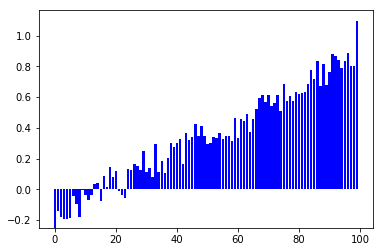

In [14]:
#plt.figure(13)
num=np.arange(len(n_grorate))
plt.bar(num,n_grorate, color = 'b')
#photo1='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\单调性.png'
#plt.savefig(photo1)
plt.show()

In [16]:
unitnet0=n_dicrate[99]
unitnet=unitnet0.cumsum()
unitnet=unitnet/100+1
w_rate=w_rate500.cumsum()+1

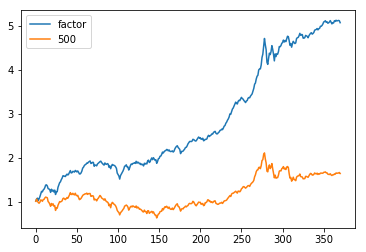

In [17]:
plt.figure(11)
plt.plot(unitnet,label='factor')
plt.plot(w_rate.T.values[0][0:len(unitnet)],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()
#photo1='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\净值.png'
#plt.savefig(photo1)

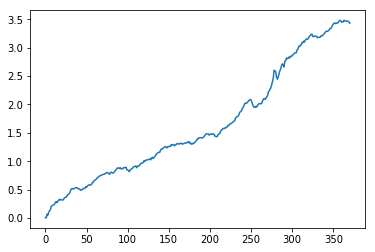

In [18]:
plt.figure(12)
plt.plot(unitnet-w_rate.T.values[0][0:len(unitnet)])
plt.show()
#photo1='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\超额净值.png'
#plt.savefig(photo1)

In [26]:
pd.rolling_mean(unitnet,10)

C:\Users\wuboyuan\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':


array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,  1.11365588,
        1.13880294,  1.16297245,  1.19065347,  1.22399441,  1.25119076,
        1.26732857,  1.2764372 ,  1.27814259,  1.27506701,  1.27476939,
        1.26855689,  1.26073694,  1.24313873,  1.22912818,  1.20774787,
        1.19876449,  1.19040562,  1.19398506,  1.20848269,  1.22142011,
        1.24057439,  1.26249966,  1.29185712,  1.3224333 ,  1.36289592,
        1.39595929,  1.42863428,  1.45439179,  1.47741955,  1.49282566,
        1.50843882,  1.52308003,  1.53833587,  1.54286284,  1.54802742,
        1.55731355,  1.56655993,  1.57137679,  1.57773929,  1.58492238,
        1.58759715,  1.58875271,  1.58284221,  1.57858857,  1.57374729,
        1.56815726,  1.56713936,  1.57413679,  1.57954601,  1.58989492,
        1.60438186,  1.61747365,  1.63645873,  1.65880952,  1.6836307 ,
        1.70749506,  1.72859558,  1.7371679 ,  1.7444844 ,  1.74

In [19]:
close_file='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\收盘价.csv'
close_data0=pd.read_csv(close_file,parse_dates=True,index_col=0)
close_data=dadjust(close_data0)
close_rate=(close_data-close_data.shift(1))/close_data.shift(1)
close_rate=close_rate[2:]

In [20]:
ma=10
dy={}
#mu=5
all_net=np.ones(2)
for i in range(1,len(fre)):
    i_data=close_rate[n_dic[i][99]].loc[fre[i]]
    if len(all_net)<6:
        if len(i_data)<6:
            i_net=i_data.T.mean()+1
            i_net=i_net.cumprod()
            i_net=pd.DataFrame(i_net)
            uz=copy.deepcopy(i_net)
        else:
            i_net=pd.DataFrame(i_data).mean()+1
            i_net=pd.DataFrame(i_net)
            uz=copy.deepcopy(i_net)
    else:
        avrge_10=non_net.rolling(center=False,window=ma).mean().iloc[-1].values[0]
        bench=non_net.iloc[-1].values[0]
        #bench=non_net.rolling(center=False,window=mu).mean().iloc[-1].values[0]
        if bench>avrge_10:
            if len(i_data)<6:
                i_net=i_data.T.mean()+1
                i_net=i_net.cumprod()
                i_net=pd.DataFrame(i_net)
                uz=copy.deepcopy(i_net)
            else:
                i_net=pd.DataFrame(i_data).mean()+1
                i_net=pd.DataFrame(i_net)
                uz=copy.deepcopy(i_net)
        else:
            if len(i_data)<6:
                i_net=i_data.T.mean()+1
                i_net=i_net.cumprod()
                i_net=pd.DataFrame(i_net)
                uz=copy.deepcopy(i_net)
            else:
                i_net=pd.DataFrame(i_data).mean()+1
                i_net=pd.DataFrame(i_net)
                uz=copy.deepcopy(i_net)
            i_net.T.values[0]=np.ones(len(i_net))
    if i==1:
        all_net=i_net
        non_net=uz
    else:
        b_bec=i_net.iloc[-1][0]
        i_net=i_net-1+all_net.iloc[len(all_net)-1].values[0]
        uz=uz-1+non_net.iloc[len(non_net)-1].values[0]
        all_net=all_net.append(i_net)
        non_net=non_net.append(uz)

In [21]:
ma=10
mu=5
all_net=np.ones(2)
for i in range(1,len(fre)):
    i_data=close_rate[n_dic[i][99]].loc[fre[i]]
    if len(all_net)<ma+1:
        if len(i_data)<6:
            i_net=i_data.T.mean()+1
            i_net=i_net.cumprod()
            i_net=pd.DataFrame(i_net)
            uz=copy.deepcopy(i_net)
        else:
            i_net=pd.DataFrame(i_data).mean()+1
            i_net=pd.DataFrame(i_net)
            uz=copy.deepcopy(i_net)
    else:
        avrge_10=non_net.rolling(center=False,window=ma).mean().iloc[-2].values[0]###
        bench=non_net.iloc[-1].values[0]
        #bench=non_net.rolling(center=False,window=mu).mean().iloc[-1].values[0]
        if bench>avrge_10:
            if len(i_data)<6:
                i_net=i_data.T.mean()+1
                i_net=i_net.cumprod()
                i_net=pd.DataFrame(i_net)
                uz=copy.deepcopy(i_net)
                in_net=i_net-1+all_net.iloc[len(all_net)-1].values[0]
                in_uz=uz-1+non_net.iloc[len(non_net)-1].values[0]
                in_non_net=non_net.append(in_uz)
                in_all_net=all_net.append(in_net)
                in_bench=in_non_net
                in_avrge=in_non_net.rolling(center=False,window=mu).mean()###
                extra=pd.DataFrame(in_bench.iloc[-len(uz):].T.values[0]-in_avrge.iloc[-len(uz)-1:-1].T.values[0],index=in_bench.iloc[-len(uz):].index)
                extra=pd.DataFrame(extra.T.values[0])
                '''if len(extra[extra<0].dropna().index)>0:
                    in_index=extra[extra<0].dropna().index[0]
                    i_net.iloc[in_index:].T.values[0]=np.ones(len(i_net.iloc[in_index:]))*i_net.iloc[in_index-1].values[0]
                '''
            else:
                i_net=pd.DataFrame(i_data).mean()+1
                i_net=pd.DataFrame(i_net)
                uz=copy.deepcopy(i_net)
        else:
            if len(i_data)<6:
                i_net=i_data.T.mean()+1
                i_net=i_net.cumprod()
                i_net=pd.DataFrame(i_net)
                uz=copy.deepcopy(i_net)
            else:
                i_net=pd.DataFrame(i_data).mean()+1
                i_net=pd.DataFrame(i_net)
                uz=copy.deepcopy(i_net)
            i_net.T.values[0]=np.ones(len(i_net))
    if i==1:
        all_net=i_net
        non_net=uz
    else:
        b_bec=i_net.iloc[-1][0]
        i_net=i_net-1+all_net.iloc[len(all_net)-1].values[0]
        uz=uz-1+non_net.iloc[len(non_net)-1].values[0]
        all_net=all_net.append(i_net)
        non_net=non_net.append(uz)

In [25]:
stand=(stand500-stand500.shift(1))/stand500.shift(1)
for i in range(1,len(fre)):
    stand_data=stand.loc[fre[i]]
    if len(stand_data)>1:
        s_net=stand_data+1
        s_net=s_net.cumprod()
    else:
        s_net=pd.DataFrame(stand_data).T+1
    if i==1:
        stand_net=s_net
    else:
        s_net=s_net-1+stand_net.iloc[-1].values[0]
        stand_net= stand_net.append(s_net)

In [26]:
end=np.argmax((np.maximum.accumulate(all_net.T.values[0]) - all_net.T.values[0]))
start=np.argmax(all_net.T.values[0][:end])
low_high=all_net.T.values[0][start]-all_net.T.values[0][end]
end1=np.argmax((np.maximum.accumulate(non_net.T.values[0]) - non_net.T.values[0]))
start1=np.argmax(non_net.T.values[0][:end1])
low_high1=non_net.T.values[0][start1]-non_net.T.values[0][end1]

In [27]:
low_high=round(low_high,2)*100
low_high1=round(low_high1,2)*100

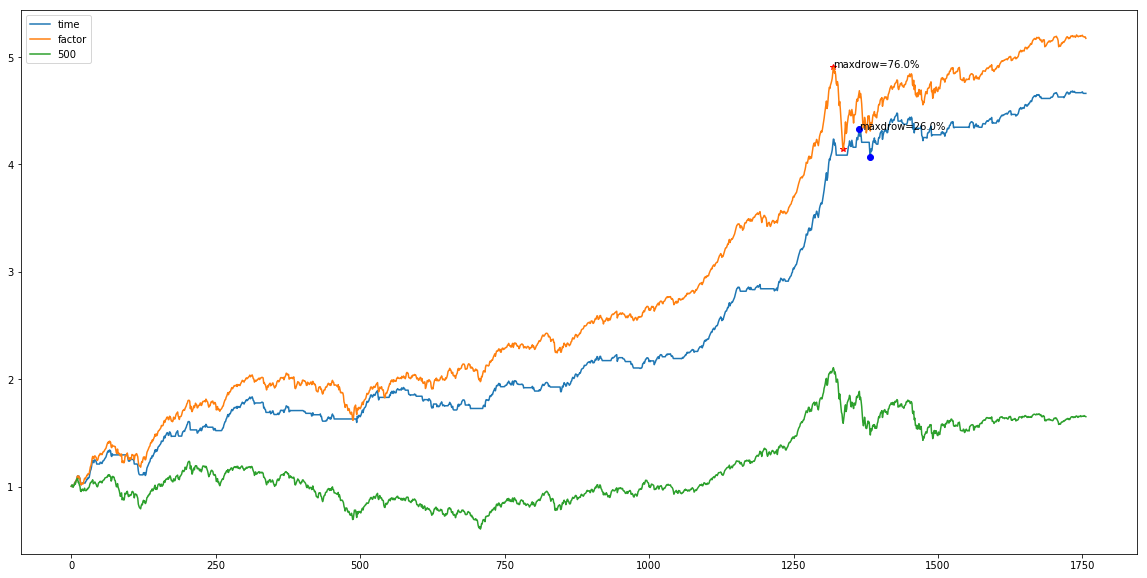

In [34]:
%matplotlib inline
plt.figure(figsize=(20,10)) 
plt.plot(all_net.T.values[0],label='time')
plt.plot(start,all_net.T.values[0][start],'o',color='b')
plt.plot(end,all_net.T.values[0][end],'o',color='b')
plt.plot(start1,non_net.T.values[0][start1],'*',color='r')
plt.plot(end1,non_net.T.values[0][end1],'*',color='r')
plt.plot(non_net.T.values[0],label='factor')
plt.plot(stand_net.T.values[0][0:len(all_net.T.values[0])],label='500')
#plt.plot(non_net.rolling(center=False,window=ma).mean().T.values[0])
plt.legend(loc=0, numpoints=1)
plt.text(start, all_net.T.values[0][start], 'maxdrow='+str(low_high)+'%')
plt.text(start1,non_net.T.values[0][start1], 'maxdrow='+str(low_high1)+'%')
#plt.axis([40, 160, 0, 0.03])
plt.show()

In [30]:
all_net.T.values[0]

array([ 1.00263444,  1.01010686,  1.01209029, ...,  4.66178662,
        4.66178662,  4.66178662])